# Import

In [1]:
#some imports...
%matplotlib inline
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import seaborn as sns
#sns.set_style("whitegrid")
#sns.set(style="ticks") 
import os
import glob
from conversions import get_file_without_path
from pingouin import ttest

#pandas and pandas options 
import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)

# Import data

In [44]:
all_data_df = pd.read_csv("data/behavior_df.csv")

# Normalising between pre and post answers

In [45]:
#Plot normalising
df_analysis = all_data_df.reset_index()

#select questions
q1_df = df_analysis.loc[df_analysis["question"] == "Q1"]
q2_df = df_analysis.loc[df_analysis["question"] == "Q2"]

#set index
q1_df = q1_df.set_index(["participant_nb", "interacting_partner","question_content", "participant_condition", "other_condition", "congruence", "sex", "day"])[["measure"]]
q2_df = q2_df.set_index(["participant_nb", "interacting_partner","question_content", "participant_condition", "other_condition", "congruence", "sex", "day"])[["measure"]]

#substract questions
norm_df = q2_df - q1_df
norm_df = norm_df.reset_index()

# Only post answers (Q2)

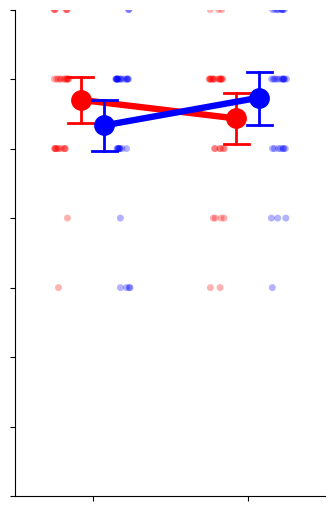

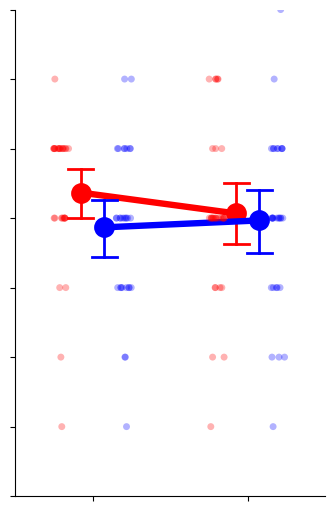

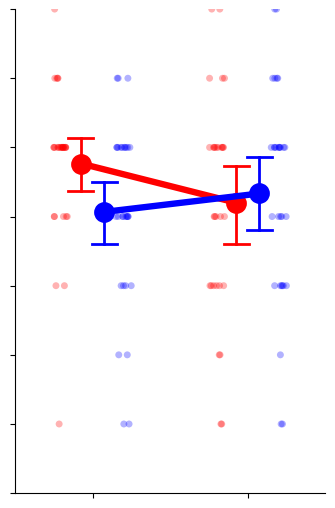

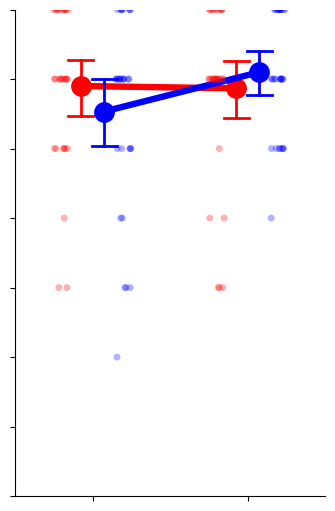

In [46]:
#Q2 answers
df_analysis = q2_df.groupby(["participant_nb","participant_condition", "other_condition","question_content"]).mean().reset_index()

for question in np.unique(norm_df.question_content.values):
    df_aux = df_analysis.copy()
    df_aux = df_aux.loc[df_aux["question_content"] == question]
    g = sns.catplot( x="participant_condition", y="measure", units="participant_nb"
                    , height=5.6
                    , aspect=0.7
                    , data=df_aux
                    , kind="point"
                    , capsize=.16
                    , hue="other_condition"
                    , legend=False
                    , scale=1.7
                    , dodge= 0.15
                    , errwidth=2
                    , palette= sns.color_palette(["red", "blue"])
                    
               )
    
    # Add individual measure points
    sns.stripplot(x="participant_condition", y="measure"
                  , data=df_aux, hue="other_condition", dodge=0.15, size=5, alpha=0.3, palette=["red", "blue"]
                  , legend=False
                 )
    
    g.set(ylim=(0, 7))
    plt.savefig("plots/q2_"+question+"_legend.pdf", bbox_inches='tight')
    g.set(xticklabels=[], yticklabels=[], title='',xlabel=None, ylabel=None)
    plt.savefig("plots/q2_"+question+".pdf", bbox_inches='tight')

# Post - pre (Q2- Q1)

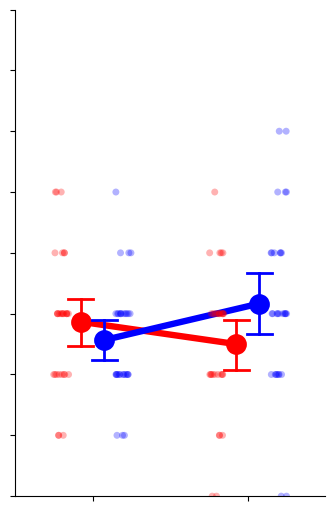

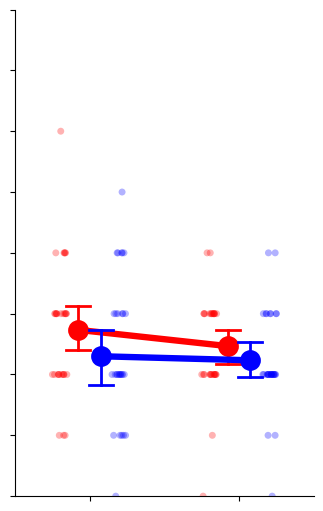

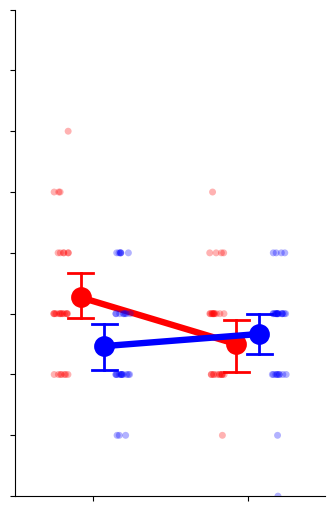

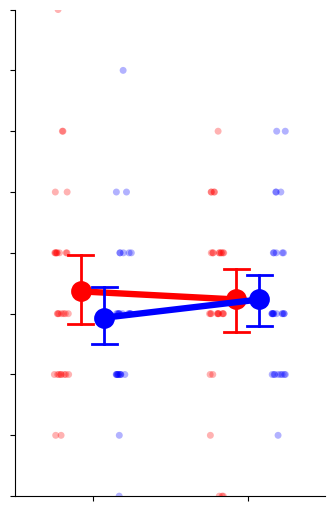

In [48]:
#Q2 answers
df_analysis = norm_df.groupby(["participant_nb","participant_condition", "other_condition","question_content"]).mean(numeric_only=True).reset_index()

for question in np.unique(norm_df.question_content.values):
    df_aux = df_analysis.copy()
    df_aux = df_aux.loc[df_aux["question_content"] == question]
    g = sns.catplot( x="participant_condition", y="measure", units="participant_nb"
                    , height=5.6
                    , aspect=0.7
                    , data=df_aux
                    , kind="point"
                    , capsize=.16
                    , hue="other_condition"
                    , legend=False
                    , scale=1.7
                    , dodge= 0.15
                    , errwidth=2
                    , palette= sns.color_palette(["red", "blue"])
               )
    # Add individual measure points
    sns.stripplot(x="participant_condition", y="measure"
                  , data=df_aux, hue="other_condition", dodge=0.15, size=5, alpha=0.3, palette=["red", "blue"]
                  , legend=False
                 )    
    
    g.set(ylim=(-2, 6))
    
    plt.savefig("plots/norm_"+question+"_legend.pdf", bbox_inches='tight')
    g.set(xticklabels=[], yticklabels=[], title='',xlabel=None, ylabel=None)
    plt.savefig("plots/norm_"+question+".pdf", bbox_inches='tight')

# SRM Q2-Q1

In [11]:
all_data_df = pd.read_csv("data/behavior_df.csv").groupby(["dyad", "participant_nb", "interacting_partner", "participant_condition", "other_condition", "congruence", "sex"]).mean(numeric_only=True).reset_index()

all_data_df = all_data_df[["dyad", "participant_nb", "interacting_partner", "participant_condition", "other_condition", "congruence", "sex"]]

In [12]:
srm_df = pd.DataFrame()
for file in glob.glob("data/*SRM_results_norm.csv"):
    print(file)
    aux_df = pd.read_csv(file)
    aux_df = aux_df[["participant_nb", "interacting_partner", "relationship"]]
    question_content = get_file_without_path(file).replace("_SRM_results_norm", "")
    aux_df["question_content"] = [question_content for i in range(len(aux_df))]
    aux_df = aux_df.dropna()
    aux_df = aux_df.merge(all_data_df, on=["participant_nb", "interacting_partner"], how="left")
    srm_df = pd.concat([srm_df, aux_df])

data/other_seeing_me_again_SRM_results_norm.csv
data/good_conversation_SRM_results_norm.csv
data/seeing_again_SRM_results_norm.csv
data/smile_SRM_results_norm.csv


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_77849/4199865681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis = srm_df.groupby(["participant_nb","participant_condition", "other_condition","question_content"]).mean().reset_index()


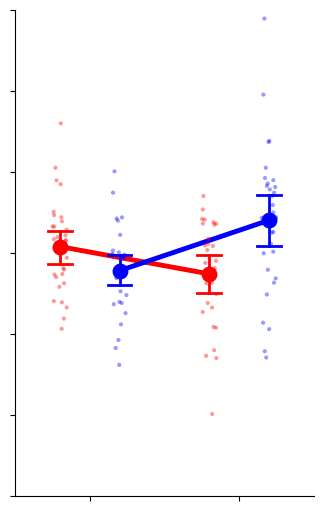

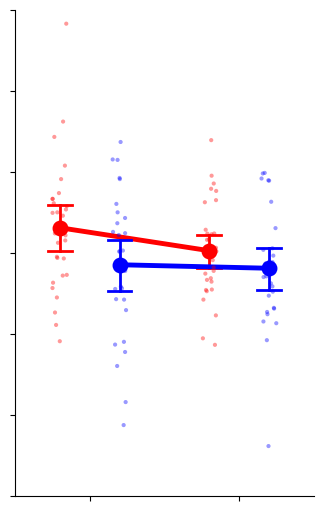

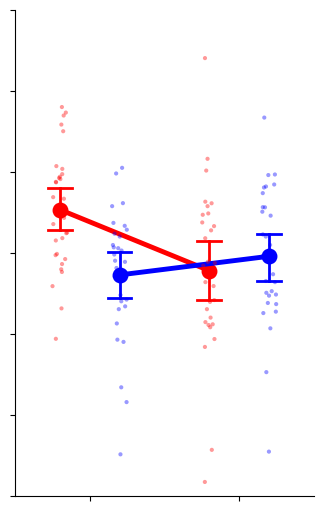

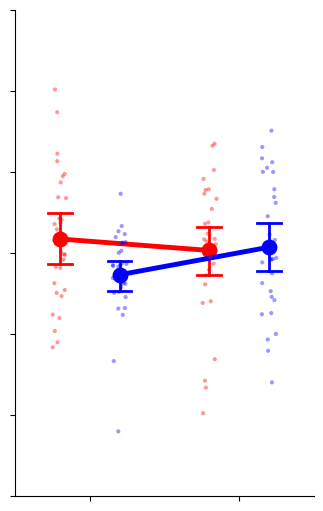

In [38]:

df_analysis = srm_df.groupby(["participant_nb","participant_condition", "other_condition","question_content"]).mean().reset_index()

for question in np.unique(df_analysis.question_content.values):
    df_aux = df_analysis.copy()
    df_aux = df_aux.loc[df_aux["question_content"] == question]
    g = sns.catplot( x="participant_condition", y="relationship", units="participant_nb"
                    , height=5.6
                    , aspect=0.7
                    , data=df_aux
                    , kind="point"
                    , capsize=.16
                    , hue="other_condition"
                    , legend=False
                    , scale=1.7
                    , dodge= 0.4
                    , errwidth=2
                    , palette= sns.color_palette(["red", "blue"])
               )
    
    g.set(ylim=(-3, 3))
    
    # Add individual measure points
    sns.stripplot(x="participant_condition", y="relationship"
                  , data=df_aux, hue="other_condition", dodge=0.15, size=3, alpha=0.4, palette=["red", "blue"]
                  , legend=False
                 )

    plt.savefig("plots/srm_"+question+"_legend.pdf", bbox_inches='tight')
    g.set(xticklabels=[], yticklabels=[], title='',xlabel=None, ylabel=None)    
    plt.savefig("plots/srm_"+question+".pdf", bbox_inches='tight')


# Debriefing data

In [16]:
#Format interacting partner
debrief_df = pd.read_csv("data/Q3_Speed_dating.csv")

In [17]:
name_map =  { "Q1"    : "participant_nb"
            , "Q21"   : "age"
            , "Q11"   : "seance"
            , "Q17"   : "date_passtion"
            , "Q2"    : "sexe"
            , "Q6_1"  : "rating_quality"
            , "Q18"   : "comm_quality"
            , 'Q28_1' : "rating_manip_sourire"
            , 'Q29'   : "comm_manip_sourire"
            , "Q25_1" : "rating_conversation_fidelity"
            , "Q26"   : "comm_conversation_fidelity"
          }

debrief_df = debrief_df.rename(name_map, axis=1)[list(name_map.values())]

debrief_df = debrief_df.iloc[1: , :]

debrief_df["age"] = [float(x) for x in debrief_df["age"].values]

In [18]:
rating_df = debrief_df.set_index(["participant_nb", "age", "seance", "date_passtion", "sexe"])

rating_df = rating_df[["rating_conversation_fidelity", "rating_manip_sourire", "rating_quality"]]

rating_df = rating_df.stack().to_frame("rating").reset_index()

rating_df = rating_df.rename({"level_5" : "question"}, axis=1)

rating_df["rating"] = [float(x) for x in rating_df["rating"].values]


T-test results for rating_quality
              T  dof alternative  p-val         CI95%  cohen-d       BF10  \
T-test  6.99083   30   two-sided    0.0  [5.07, 5.96]  1.25559  1.639e+05   

        power  
T-test    1.0  

T-test results for rating_conversation_fidelity
              T  dof alternative    p-val        CI95%  cohen-d   BF10  \
T-test -2.18816   30   two-sided  0.03658  [3.0, 3.97]    0.393  1.518   

          power  
T-test  0.56273  

T-test results for rating_manip_sourire
              T  dof alternative  p-val       CI95%  cohen-d   BF10    power
T-test -2.03286   30   two-sided  0.051  [2.9, 4.0]  0.36511  1.163  0.50309


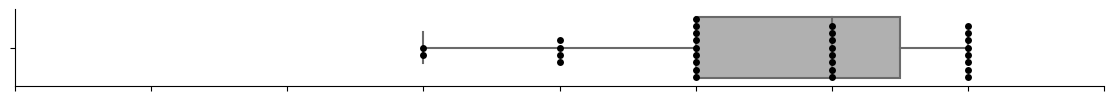

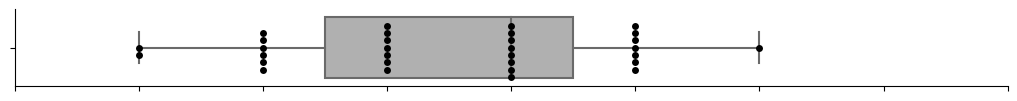

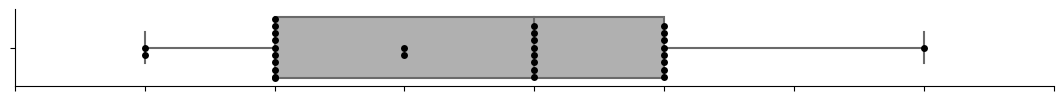

In [26]:
palette = [(0.691, 0.691, 0.691), (0.691, 0.691, 0.691), (0.691, 0.691, 0.691)]
questions = ["rating_quality", 'rating_conversation_fidelity', "rating_manip_sourire"]

with sns.color_palette(palette):
    for question in questions:
        df_analysis = rating_df.loc[rating_df["question"] ==  question]

        g = sns.catplot(x="rating", y="question", data=df_analysis, kind="box", aspect=8.3,  height=1.5)
        sns.swarmplot(y="question", x="rating", data=df_analysis, color = "black", size =5)

        g.set(xticklabels=[], yticklabels=[], title='',xlabel=None, ylabel=None)
        
        g.set(xlim=(0, 8))
        
        plt.savefig("plots/ind_debriefing_results_"+ question + ".pdf", bbox_inches='tight')

        #Test
        print("")
        print("T-test results for " + question)
        print(ttest(df_analysis["rating"].values, 4).round(5))
        

In [70]:
palette = [(0.691, 0.691, 0.691), (0.691, 0.691, 0.691), (0.691, 0.691, 0.691)]
questions = ["rating_quality", 'rating_conversation_fidelity', "rating_manip_sourire"]

with sns.color_palette(palette):
    for question in questions:
        df_analysis = rating_df.loc[rating_df["question"] ==  question]
        print()
        print(question)
        print(len(df_analysis))
        print(str(len(df_analysis.loc[df_analysis["rating"]<=4]) / len(df_analysis)))



rating_quality
31
0.1935483870967742

rating_conversation_fidelity
31
0.7419354838709677

rating_manip_sourire
31
0.7096774193548387
